In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df['class'].unique()

# class is our target variable, we are predicting if the mushroom is edible or poisonous

array(['p', 'e'], dtype=object)

In [7]:
X = df.drop('class', axis=1)
y = df['class']

In [9]:
X = pd.get_dummies(X, drop_first=True)
y = LabelEncoder().fit_transform(y)

# we converted our data because all of our data is categorical and it should be numerical for model to work

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:

model =  DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9815422477440525

[Text(0.5769230769230769, 0.875, 'x[22] <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2928, 2758]'),
 Text(0.3076923076923077, 0.625, 'x[42] <= 0.5\ngini = 0.282\nsamples = 3220\nvalue = [546, 2674]'),
 Text(0.15384615384615385, 0.375, 'x[50] <= 0.5\ngini = 0.122\nsamples = 2833\nvalue = [185, 2648]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.041\nsamples = 2705\nvalue = [57, 2648]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 128\nvalue = [128, 0]'),
 Text(0.46153846153846156, 0.375, 'x[82] <= 0.5\ngini = 0.125\nsamples = 387\nvalue = [361, 26]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 361\nvalue = [361, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.8461538461538461, 0.625, 'x[80] <= 0.5\ngini = 0.066\nsamples = 2466\nvalue = [2382, 84]'),
 Text(0.7692307692307693, 0.375, 'x[50] <= 0.5\ngini = 0.029\nsamples = 2418\nvalue = [2382, 36]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.004\nsamples = 2374\nvalu

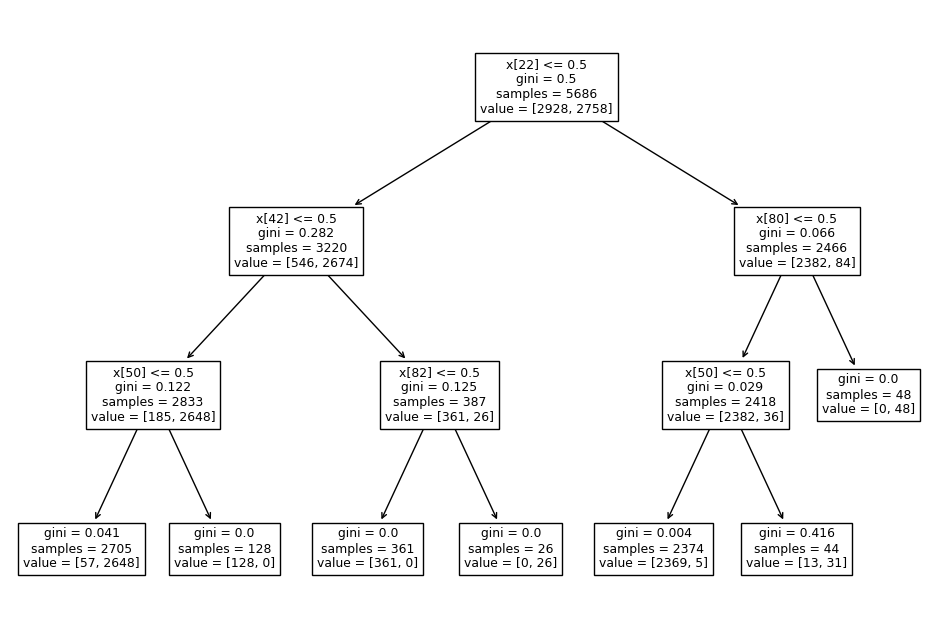

In [11]:
# Lets see the tree
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(X_train, y_train))